#**IRIS Dataset**

**Descripition:**The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements.

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the dataset

df=pd.read_csv("/content/drive/MyDrive/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

columns are 5 and rows are 150

In [ ]:
#columns names

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
#data type of columns

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#checking null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
a=df.corr()
a

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#**Exploratory Data Analysis**

<Axes: title={'center': 'Coorelation'}>

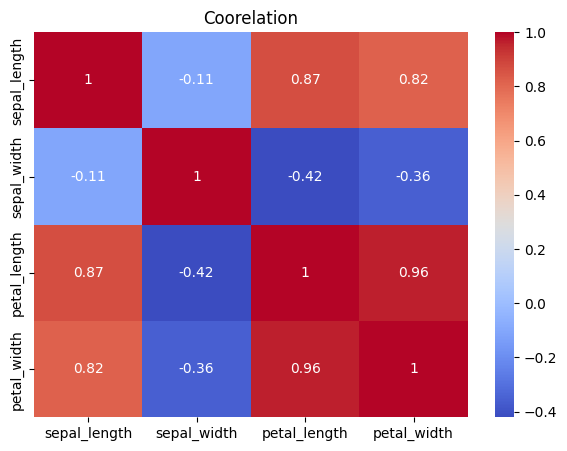

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Coorelation")
sns.heatmap(a,annot=True,cmap='coolwarm')

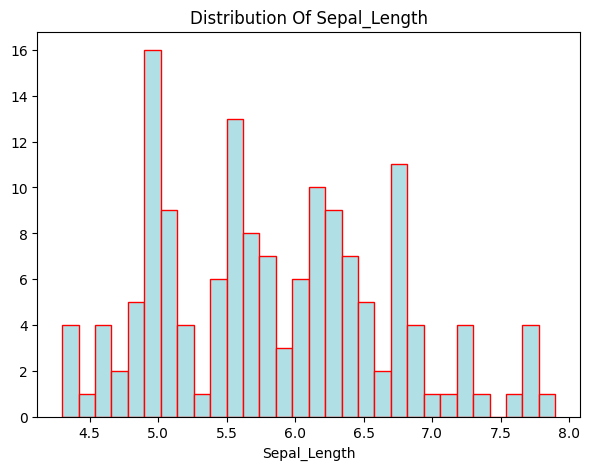

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution Of Sepal_Length")
plt.xlabel("Sepal_Length")
plt.hist(df['sepal_length'],bins=30,edgecolor="red",color='powderblue')
plt.show()

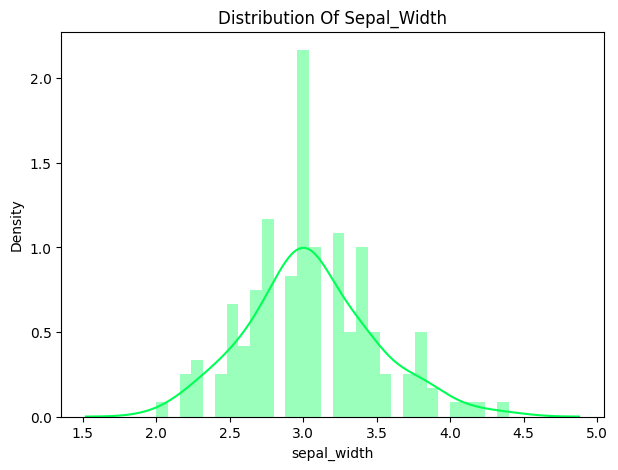

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution Of Sepal_Width")
plt.xlabel("Sepal_Width")
sns.distplot(df['sepal_width'],bins=30,color='#00ff55')
plt.show()

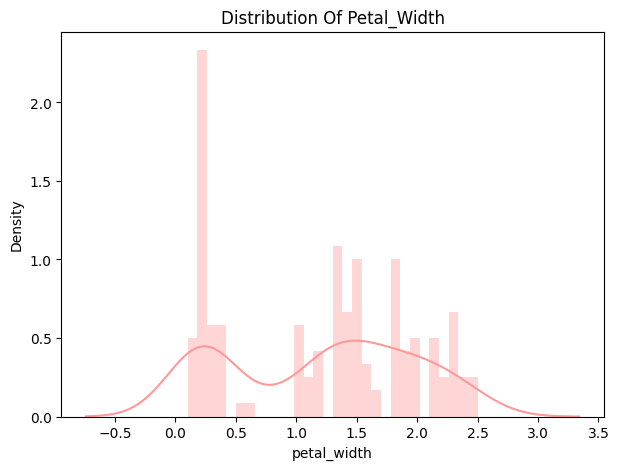

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution Of Petal_Width")
plt.xlabel("Petal_Width")
sns.distplot(df['petal_width'],bins=30,color='#ff9999')
plt.show()

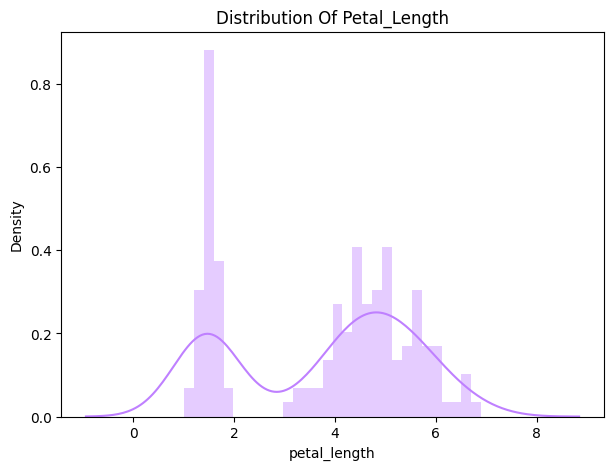

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution Of Petal_Length")
plt.xlabel("Petal_Length")
sns.distplot(df['petal_length'],bins=30,color='#bf80ff')
plt.show()

#**Pre-Processing**

In [ ]:
encode=LabelEncoder()
df['species']=encode.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#**Model Selection**

In [ ]:
x=df.drop('species',axis=1)
y=df['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [ ]:
x_test.shape,y_test.shape

((30, 4), (30,))

#**Model Building**

In [ ]:
data={'Model Name':[],'MAPE':[],'RMSE':[],'Accuracy':[]}
df1=pd.DataFrame(data)

In [ ]:
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc_gb=(100*accuracy_score(y_test,pred))
rmse=np.sqrt(np.mean(y_test-pred)**2)
mape=(np.mean(np.abs(((y_test-pred)/y_test))))*100
df2={'Model Name':'GaussianNB','MAPE':mape,'RMSE':rmse,'Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

In [ ]:
ml=MultinomialNB()
ml.fit(x_train,y_train)
pred2=ml.predict(x_test)
acc_ml=(100*accuracy_score(y_test,pred2))
rmse=np.sqrt(np.mean(y_test-pred2)**2)
mape=(np.mean(np.abs(((y_test-pred2)/y_test))))*100
df2={'Model Name':'MultinomialNB','MAPE':mape,'RMSE':rmse,'Accuracy':acc_ml}
df1=df1.append(df2,ignore_index=True)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred3=dt.predict(x_test)
acc_dt=(100*accuracy_score(y_test,y_pred3))
rmse=np.sqrt(np.mean(y_test-y_pred3)**2)
mape=(np.mean(np.abs(((y_test-y_pred3)/y_test))))*100
df2={'Model Name':'DecisionTreeClassifier','MAPE':mape,'RMSE':rmse,'Accuracy':acc_dt}
df1=df1.append(df2,ignore_index=True)

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred4=svm.predict(x_test)
acc_svm=(100*accuracy_score(y_test,y_pred4))
rmse=np.sqrt(np.mean(y_test-y_pred4)**2)
mape=(np.mean(np.abs(((y_test-y_pred4)/y_test))))*100
df2={'Model Name':'SVC','MAPE':mape,'RMSE':rmse,'Accuracy':acc_svm}
df1=df1.append(df2,ignore_index=True)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred5=svm.predict(x_test)
acc_knn=(100*accuracy_score(y_test,y_pred5))
rmse=np.sqrt(np.mean(y_test-y_pred5)**2)
mape=(np.mean(np.abs(((y_test-y_pred5)/y_test))))*100
df2={'Model Name':'KNeighborsClassifier','MAPE':mape,'RMSE':rmse,'Accuracy':acc_knn}
df1=df1.append(df2,ignore_index=True)

In [ ]:
random=RandomForestClassifier()
random.fit(x_train,y_train)
y_pred6=random.predict(x_test)
acc_random=(100*accuracy_score(y_test,y_pred6))
rmse=np.sqrt(np.mean(y_test-y_pred6)**2)
mape=(np.mean(np.abs(((y_test-y_pred6)/y_test))))*100
df2={'Model Name':'KNeighborsClassifier','MAPE':mape,'RMSE':rmse,'Accuracy':acc_random}
df1=df1.append(df2,ignore_index=True)

#**Model Evaluation**

In [ ]:
df1

,Model Name,MAPE,RMSE,Accuracy
0,GaussianNB,3.571429,0.033333,96.666667
1,MultinomialNB,14.285714,0.133333,86.666667
2,DecisionTreeClassifier,7.142857,0.033333,96.666667
3,SVC,7.142857,0.033333,96.666667
4,KNeighborsClassifier,7.142857,0.033333,96.666667
5,KNeighborsClassifier,7.142857,0.033333,96.666667


Text(0.5, 1.0, 'Confusion Matix of GaussianNB')

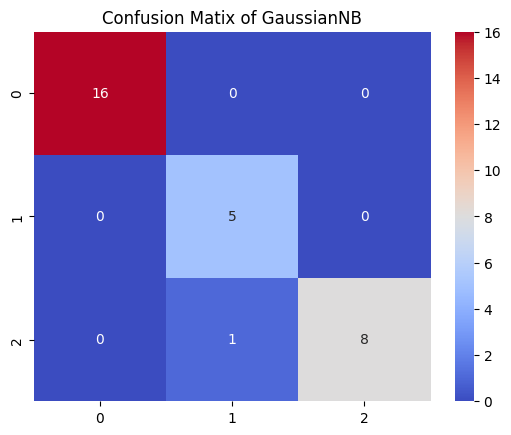

In [ ]:
cf_gb=confusion_matrix(y_test,pred)
sns.heatmap(cf_gb,annot=True,cmap='coolwarm')
plt.title("Confusion Matix of GaussianNB")

#**Result:**The accuracy score are almost same of all the models but MAPE are different the low mean abosulte percentage error is Gaussian model.